# **Notebook 3: Feature Engineering**

## Objectives

* **Transform Raw Features:**
  * Engineer new features based on domain knowledge, including house age, ratios, and composite scores.
  * Refine existing features to reduce redundancy and multicollinearity, enhancing their predictive power.
* **Prepare Data for Modeling:**
  * Address multicollinearity by identifying and removing highly correlated features.
  * Scale and encode features to ensure compatibility with machine learning algorithms.
* **Document Key Decisions:**
  * Provide justification for feature engineering steps, including the creation, transformation, and removal of features, to ensure reproducibility and transparency.

## Inputs

* **Processed Datasets:**
  * `house_prices_cleaned.csv`: Cleaned version of the house prices dataset containing 1460 rows and 22 columns.
* **Raw Datasets:**
  * `inherited_houses.csv`: Raw version of the inherited houses dataset containing 4 rows and 23 columns, as no cleaning was required.
* **Saved Location:**
  * Processed datasets are located in `outputs/datasets/processed/cleaned/`.
  * Raw dataset for inherited houses is located in `outputs/datasets/raw/`.

## Outputs

* **Feature-Engineered Datasets:**
  * `x_train_transformed.csv`: Transformed and scaled training dataset, saved in the `outputs/datasets/processed/transformed/` folder.
  * `x_test_transformed.csv`: Transformed and scaled testing dataset, saved in the `outputs/datasets/processed/transformed/` folder.
* **Documentation:**
  * Summary of transformations, feature creating, and rationale for decisions, including addressing multicollinearity and scaling. 

## Additional Comments

* **Key Considerations:**
  * Domain knowledge, exploratory analyses, and statistical methods guided feature engineering decisions.
  * Uniform transformations, scaling, and encoding techniques will be applied to ensure consistency across the datasets.
* **Methodology:**
  * This notebook aligns with the Data Preparation and Transformation steps of the CRISP-DM methodology.
* **Next Steps:**
  * The outputs of this notebook will be used in the price analysis and modeling notebooks to derive insights and build predictive models for house sale prices. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Load and Review Cleaned Data

In this step, we will:
1. Load the cleaned dataset for `house_prices_records.csv` from the processed directory.
2. Load the raw dataset for `inherited_houses.csv` (since no cleaning was necessary).
3. Review the structure and contents of both datasets to ensure readiness for feature engineering.

### Expected Outcomes

1. **House Prices Dataset (`house_prices_cleaned.csv`):**
   - Contains no missing values or duplicates.
   - Includes relevant columns with standardized formatting.
   - Correct data types for all columns (e.g., `SalePrice` as numeric, categorical columns as `object`).
   - The number of rows and columns matches the cleaned dataset structure.

2. **Inherited Houses Dataset (`inherited_houses.csv`):**
   - Matches the structure of the `house_prices_cleaned.csv` dataset minus the `SalePrice` column.
   - Contains no missing values or inconsistencies.

3. **Verification Outputs:**
   - `info()` method confirms that data types and non-null counts are correct.
   - `head()` provides a preview of the first few rows to confirm expected structure.

In [4]:
import pandas as pd

# Load the cleaned dataset for house prices
house_prices_path = "outputs/datasets/processed/cleaned/house_prices_cleaned.csv"
df_cleaned = pd.read_csv(house_prices_path)

# Load the raw dataset for inherited houses
inherited_houses_path = "outputs/datasets/raw/inherited_houses.csv"
df_inherited = pd.read_csv(inherited_houses_path)

# Display basic information about the datasets
print("House Prices Dataset:")
print(df_cleaned.info())
print("\nInherited Houses Dataset:")
print(df_inherited.info())

# Display first few rows of the datasets
print("\nPreview of House Prices Dataset:")
display(df_cleaned.head())
print("\nPreview of Inherited Houses Dataset:")
display(df_inherited.head())

House Prices Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   int64  
 2   BedroomAbvGr  1460 non-null   int64  
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   int64  
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   float64
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalB

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,Glq,150,548,Rfn,2003,...,8450.0,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0,3,Gd,978,Alq,284,460,Rfn,1976,...,9600.0,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866,3,Mn,486,Glq,434,608,Rfn,2001,...,11250.0,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0,0,No,216,Alq,540,642,Unf,1998,...,9550.0,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0,4,Av,655,Glq,490,836,Rfn,2000,...,14260.0,84.0,350.0,84,5,8,1145,2000,2000,250000



Preview of Inherited Houses Dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


---

## Feature Selection

Feature selection is a critical step in the data preparation process. It involves identifying the most relevant features for predicting house sale prices while removing redundant or irrelevant ones. This process enhances model performance, simplifies the modeling process, and improves interpretability.

In this section, we will:
1. Perform correlation analysis to identify strongly correlated features.
2. Use machine learning-based feature importance to rank features.
3. Validate the selected features against domain knowledge to ensure relevance.

### Correlation Analysis

To start, we willevaluate the relationship between each feature and the target variable (`SalePrice`) using correlation coefficients. We will then visualize the results to identify features with strong predictive potential.

**Steps:**
1. Compute Pearson and Spearman correlations between features and `SalePrice`.
2. Visualize the top correlated features using scatter plots and a heatmap.
3. Document observations to guide the next steps.

Top Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
LotArea         0.389000
Name: SalePrice, dtype: float64


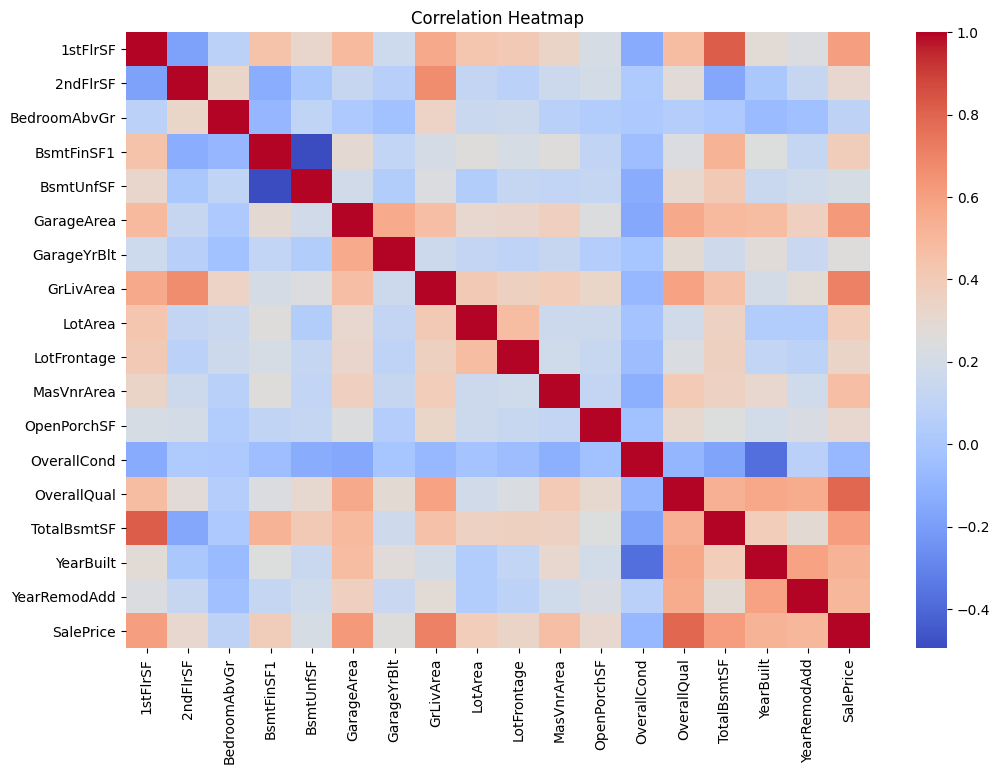

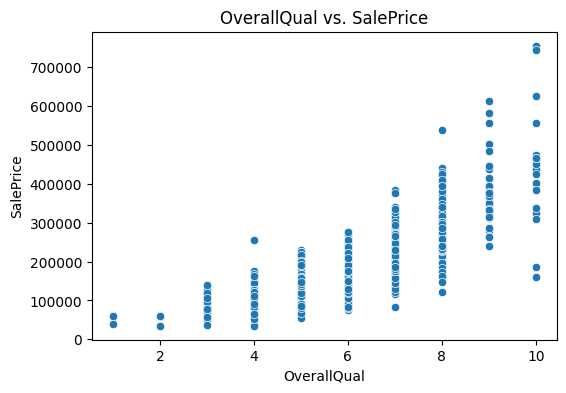

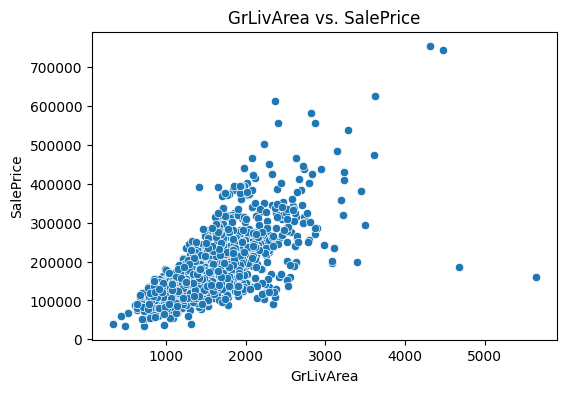

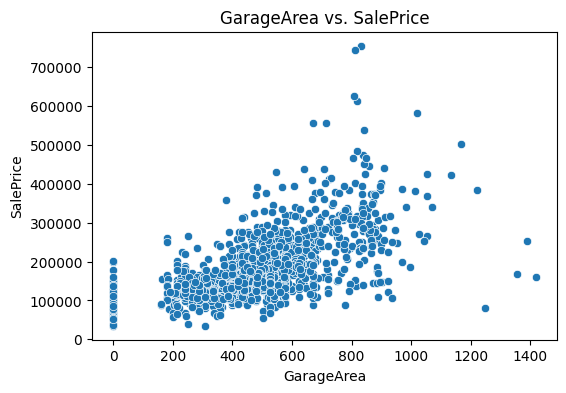

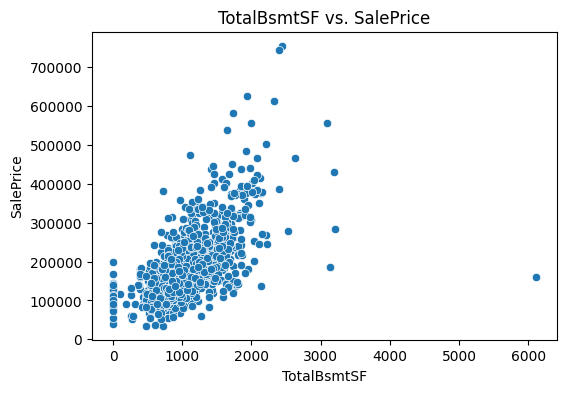

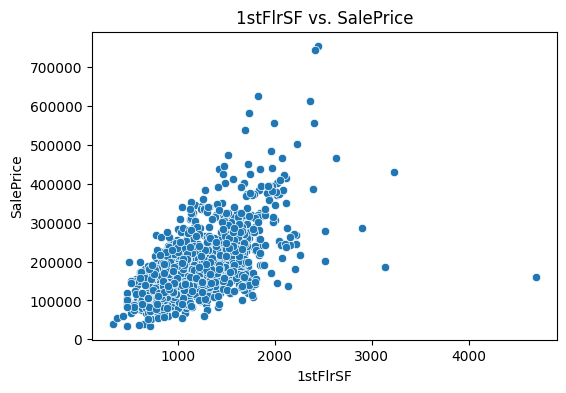

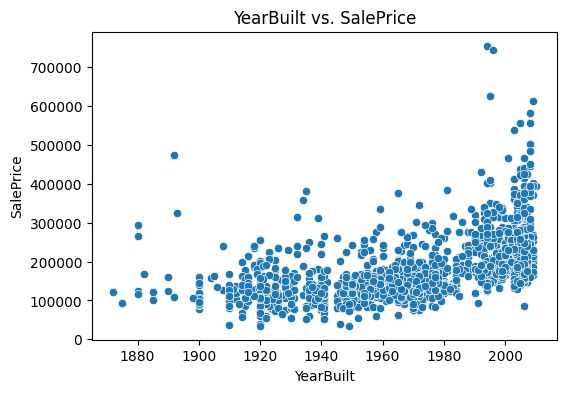

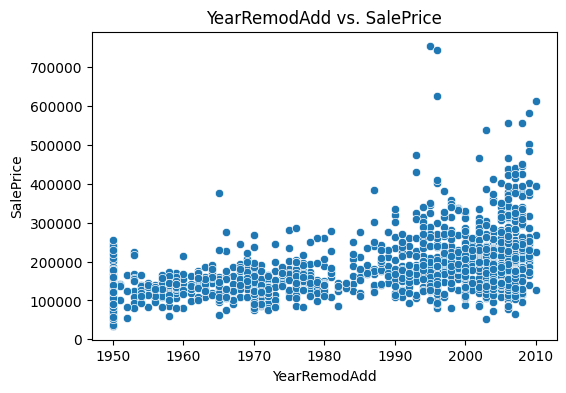

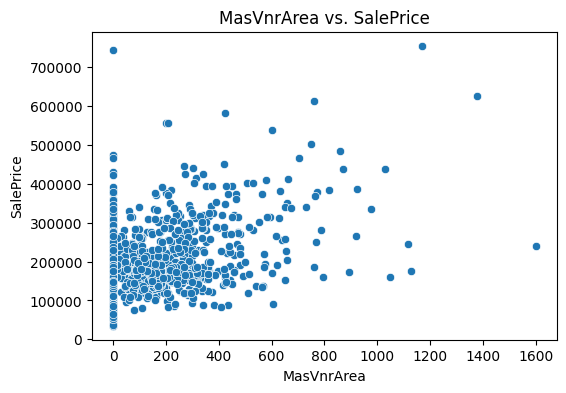

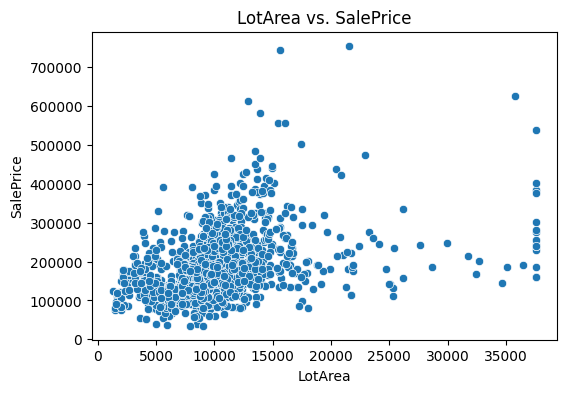

In [5]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Extract top correlated features with SalePrice
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("Top Correlated Features with SalePrice:")
print(top_corr)

# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for top features
top_features = top_corr.index[1:]
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='SalePrice', data=df_cleaned)
    plt.title(f"{feature} vs. SalePrice")
    plt.show()

### Feature Importance via Machine Learning

In this step we will use a Random Forest model to evaluate the importance of features for predicting `SalePrice`. This method helps identify features with high predictive power, even if they have non-linear relationships with the target.

**Steps:**
1. Train a simple Random Forest Regressor using the cleaned dataset.
2. Rank features based on their importance scores.
3. Document and visualize the results.

Categorical Columns: Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')
Data after encoding:
   1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  GarageArea  \
0       856       854             3         706        150         548   
1      1262         0             3         978        284         460   
2       920       866             3         486        434         608   
3       961         0             0         216        540         642   
4      1145         0             4         655        490         836   

   GarageYrBlt  GrLivArea  LotArea  LotFrontage  ...  BsmtFinType1_Lwq  \
0         2003       1710   8450.0         65.0  ...                 0   
1         1976       1262   9600.0         80.0  ...                 0   
2         2001       1786  11250.0         68.0  ...                 0   
3         1998       1717   9550.0         60.0  ...                 0   
4         2000       2198  14260.0         84.0  ...    

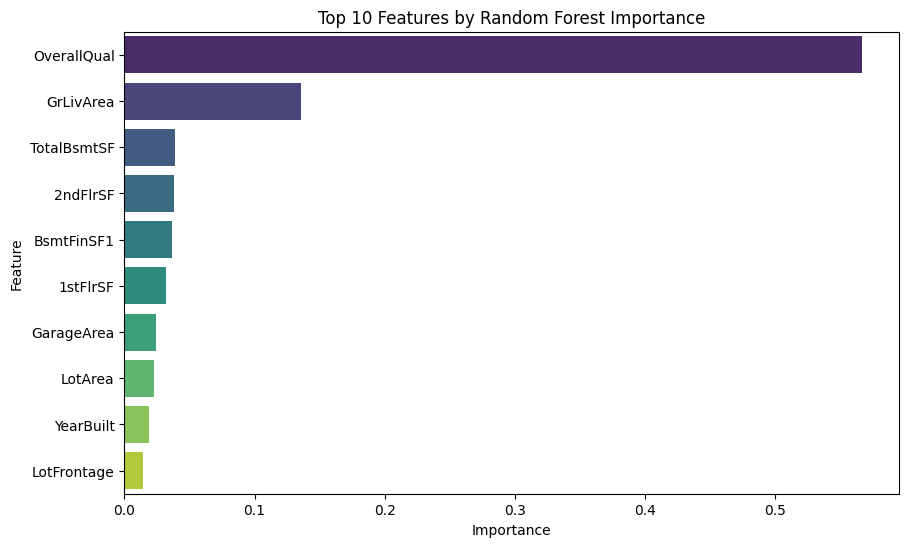

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Data
x = df_cleaned.drop(columns=['SalePrice'])
y = df_cleaned['SalePrice']

# Encode categorical variables
categorical_columns = x.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Perform one-hot encoding
x_encoded = pd.get_dummies(x, columns=categorical_columns, drop_first=True)
print("Data after encoding:")
print(x_encoded.head())

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': x_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(feature_importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Features by Random Forest Importance")
plt.show()

### Feature Validation

**Observations:**
1. **Key Drivers of Sale Price:**
   - `OverallQual` (Overall Material and Finish Quality) is by far the most important feature contributing approximately 56.7% to the model's predictive power. This reaffirms that the overall quality of a house is a strong determinant of its sale price.
   - `GrLivArea` (Above Ground Living Area) ranks second, with a relative importance of 13.5%, highlighting the impact of livable space on house prices.
2. **Moderately Important Features:**
    - `TotalBsmtSF` (Total Basement Square Footage), `2ndFlrSF` (Second Floor Square Footage), and `BsmtFinSF1` (Finished Basement Square Footage) all have similar contributions, each accounting for approximately 3.6-3.8% of the model's predictions.
    - `1stFlrSF` (First Floor Square Footage) and `GarageArea` (Garage Size) also play noticeable roles in predicting sale prices, emphasizing the value of usable spaces.
3. **Other Influential Features:**
   - `LotArea` (Lot Size) and `LotFrontage` (Street Frontage) are also relevant but less significant, suggesting that external property attributes have a moderate influence on sale prices.
   - `YearBuilt` (Year of Construction) contributes 1.9%, which may capture trends in construction practices or preferences for newer homes.
4. **Implications:**
   - These insights indicate that both internal attributes (e.g., quality, living area) and external attributes (e.g., lot size, frontage) matter, though internal attributes tend to dominate in their influence on sale prices.
   - The feature importance ranking can guide feature selection for downstream modeling efforts, focusing on top predictors like `OverallQual` and `GrLivArea` to improve model edficiency without significant loss of performance.

---

## Feature Transformation

To improve model performance, we apply transformations to the selected features. These transformations address issues such as skewness, scaling differences, and categorical encodings.

### Objectives:
- Normalize or scale numerical features.
- Encode categorical features.
- Handle potential outliers in numerical features.

### Step 1: Identify Transformations Needed

Before applying transformations, we need to inspect the distributions of the selected features and determine the type of transformations required. The following steps are considered:
- Check numerical features for skewness and scale differences.
- Identify categorical features that need encoding.

Skewness of Numerical Features:
BsmtExposure_None    6.232060
KitchenQual_Fa       5.797800
BsmtFinType1_Lwq     4.110132
BsmtExposure_Mn      3.109740
BsmtFinType1_Rec     3.005520
BsmtExposure_Gd      2.908305
BsmtFinType1_Blq     2.715273
LotFrontage          2.697686
BsmtFinType1_None    2.682856
LotArea              2.482548
OpenPorchSF          2.331890
MasVnrArea           2.294117
GarageFinish_None    1.864915
BsmtFinSF1           1.862132
TotalBsmtSF          1.723881
GrLivArea            1.425139
1stFlrSF             1.422162
GarageFinish_Rfn     1.150916
BsmtFinType1_Glq     1.114516
BsmtFinType1_Unf     1.029450
BsmtUnfSF            0.910628
2ndFlrSF             0.881700
OverallCond          0.733180
GarageFinish_Unf     0.524628
KitchenQual_Gd       0.398581
OverallQual          0.196575
GarageArea           0.109110
KitchenQual_TA      -0.017146
YearRemodAdd        -0.508067
YearBuilt           -0.623404
BedroomAbvGr        -0.662156
BsmtExposure_No     -0.668822
GarageYr

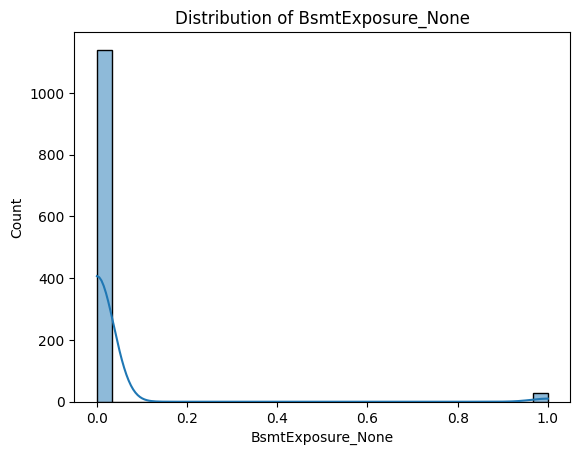

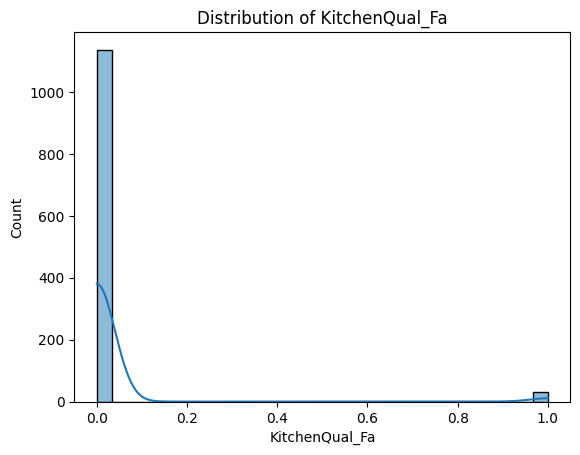

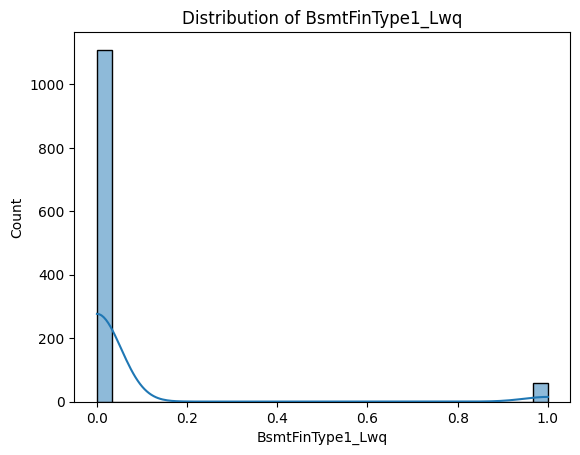

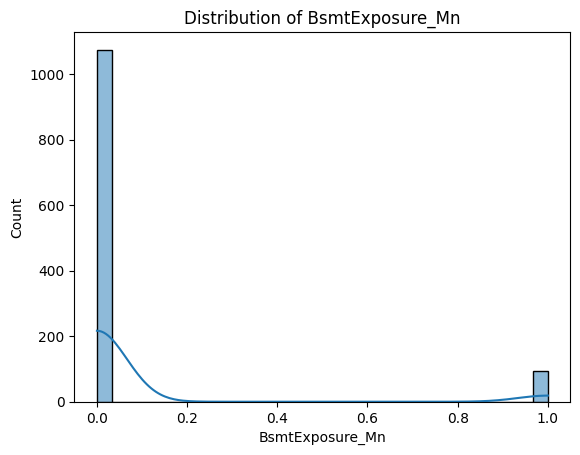

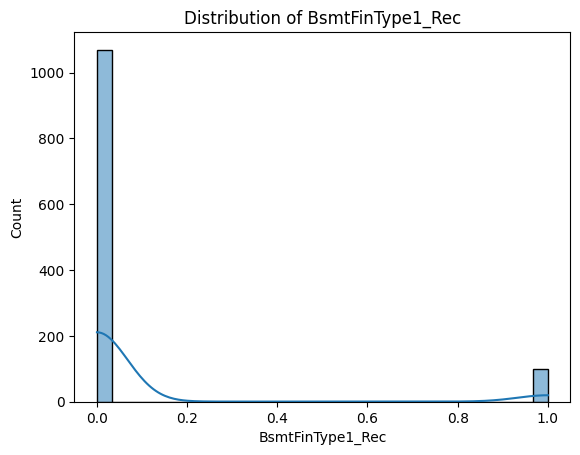

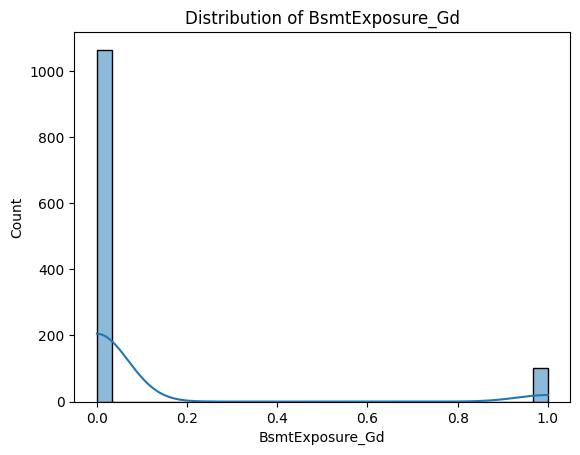

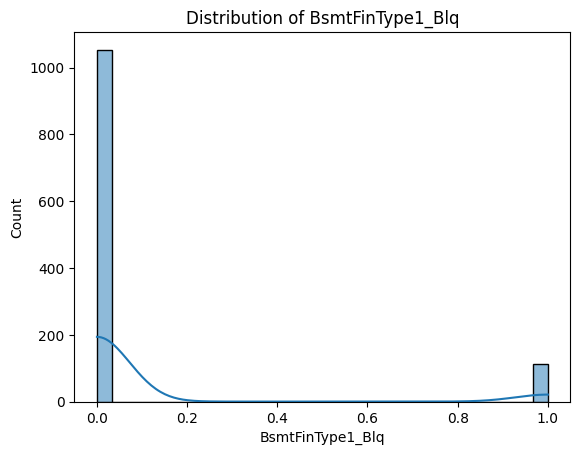

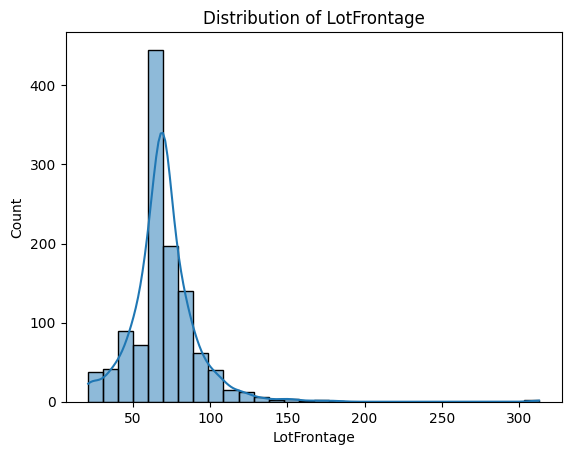

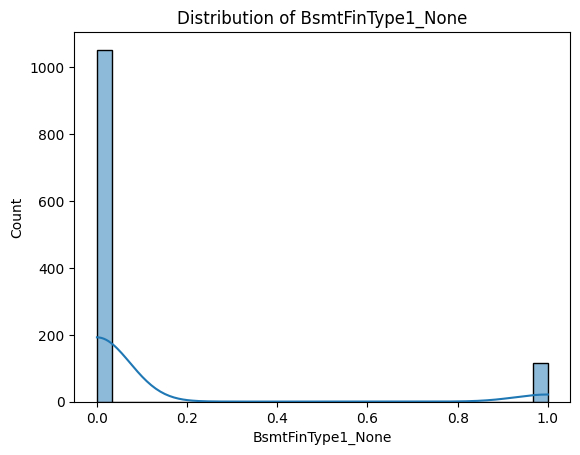

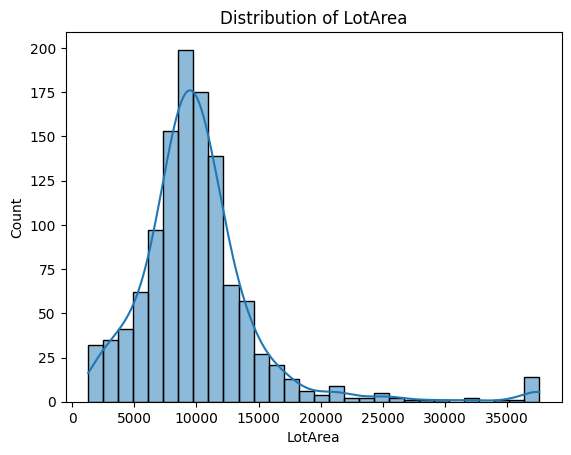

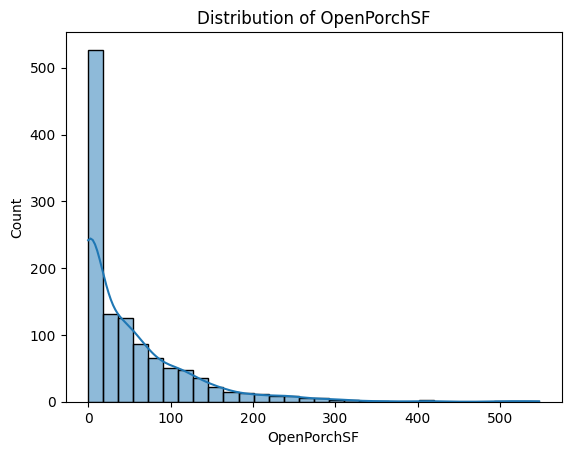

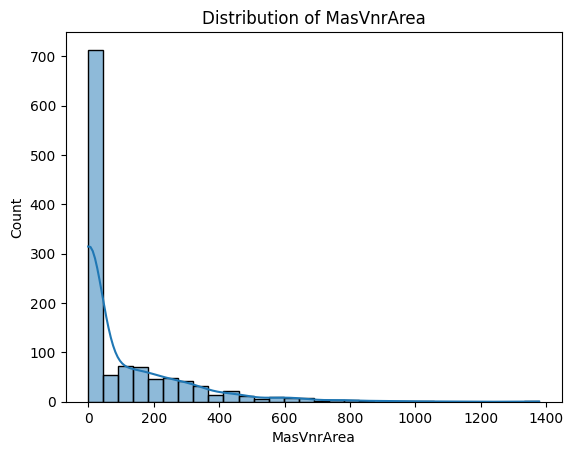

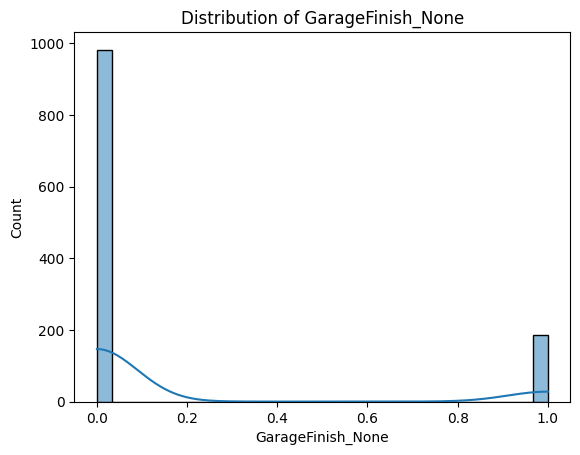

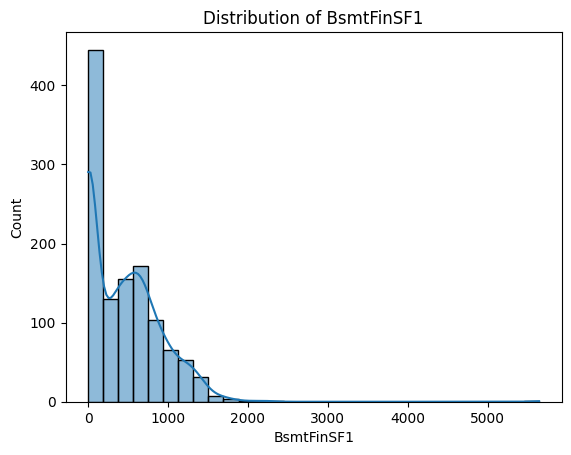

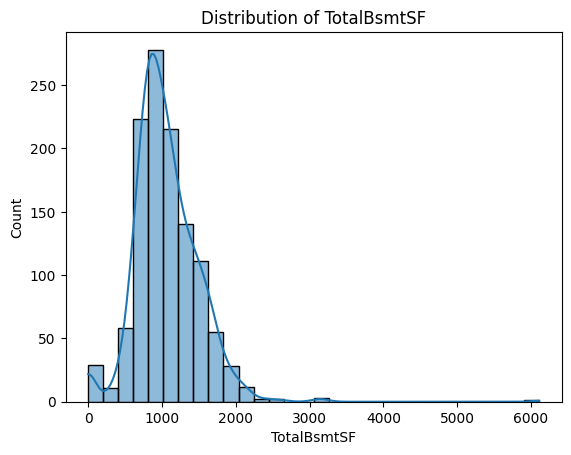

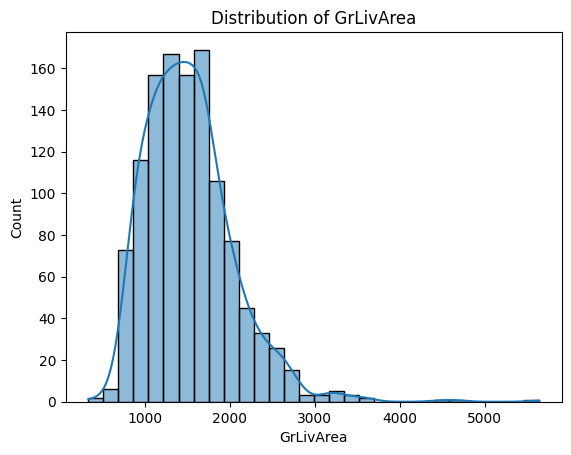

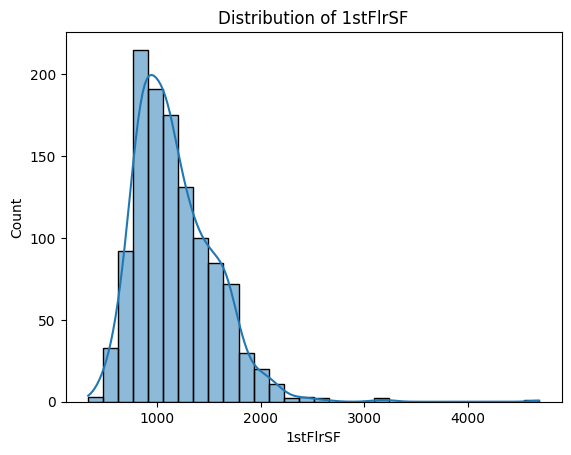

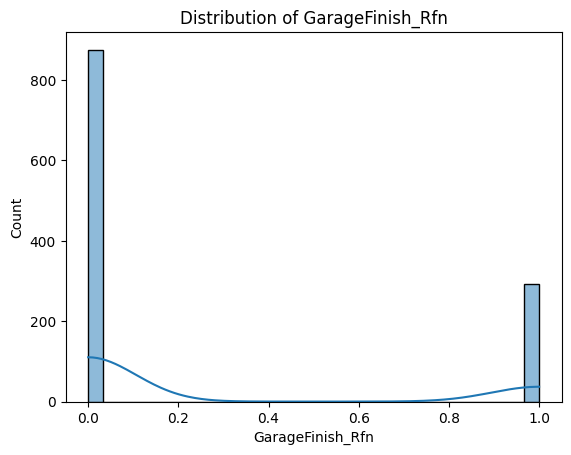

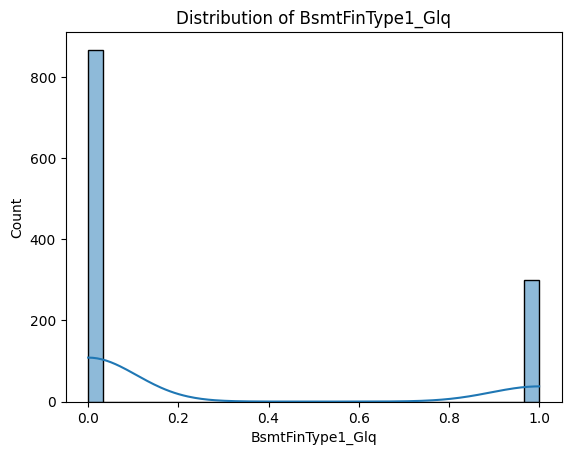

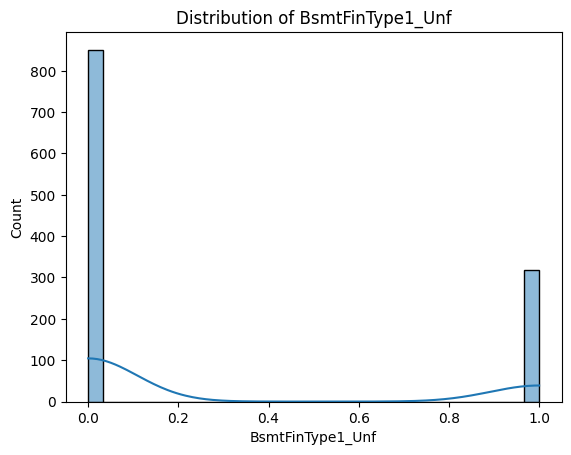

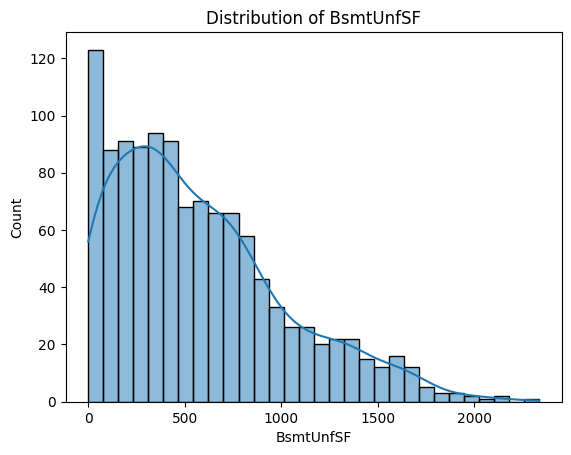

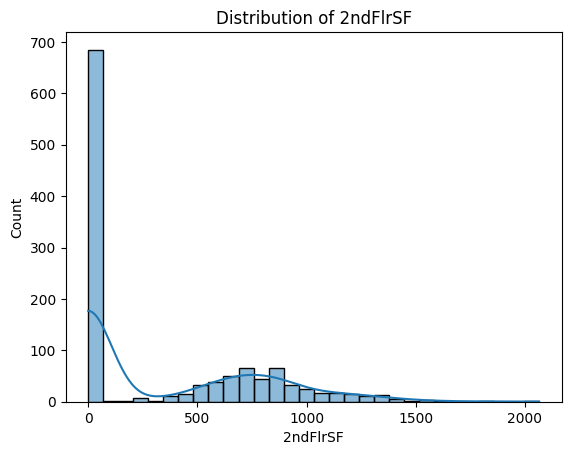

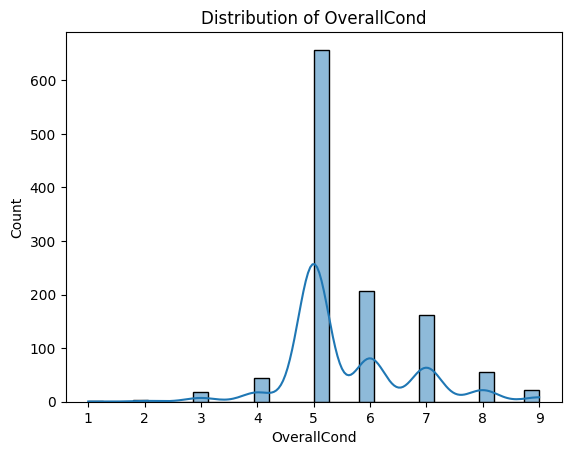

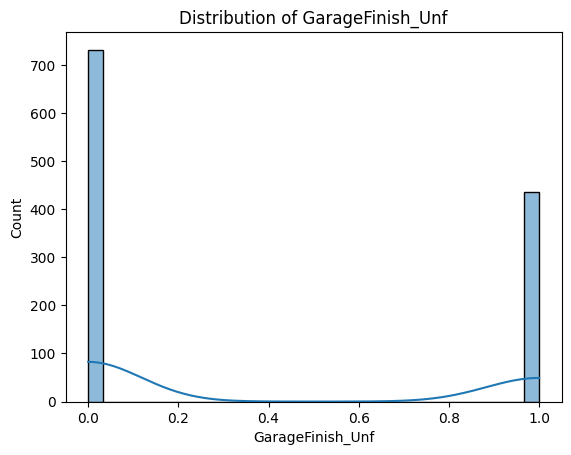

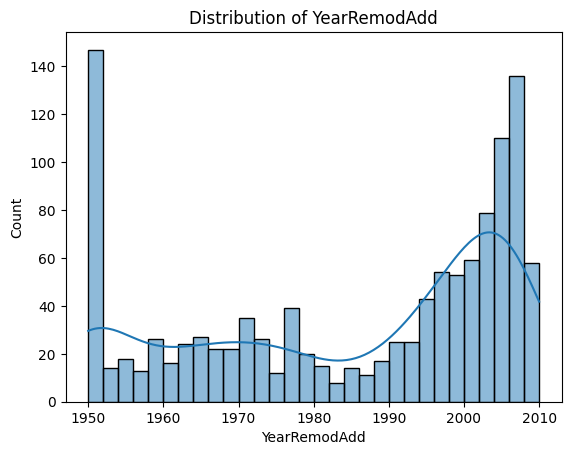

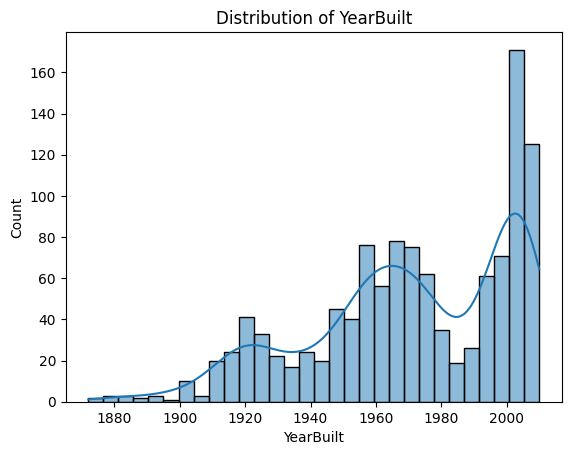

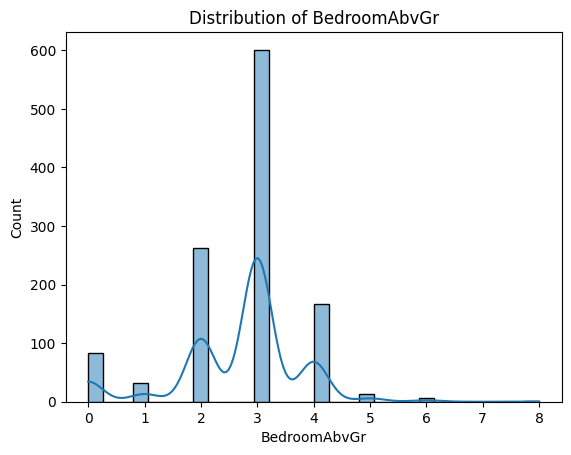

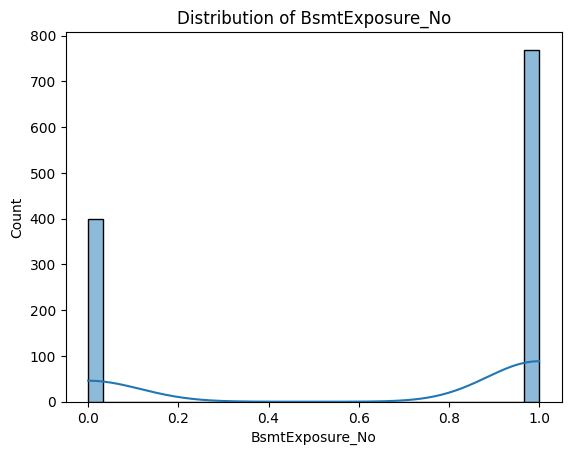

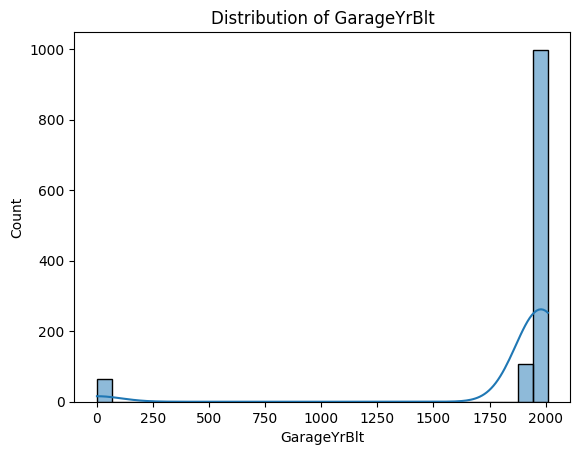

In [7]:
import numpy as np

# Check skewness of numerical features
skewed_features = x_train.skew().sort_values(ascending=False)
print("Skewness of Numerical Features:")
print(skewed_features)

# Plot distribution of skewed features
skewed_cols = skewed_features[abs(skewed_features) > 0.5].index
for col in skewed_cols:
    sns.histplot(x_train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### Step 2: Apply Transformations

Based on the analysis, the following transformations will be applied:
1. **Log Transformation:** Apply to features with significant positive skewness (e.g., `BsmtExposure_None`, `LotFrontage`, `LotArea`, etc.).
2. **No Transformation:** For features with negligible skewness (e.g., `OverallQual`, `GarageArea`).
3. **Special Handling:** For features with negative skewness (e.g., `YearBuilt`, `BedroomAbvGr`), transformations like reflecting values (subtracting from a constant) may be considered.

In [8]:
# Create deep copies of x_train and x_test
x_train = x_train.copy()
x_test = x_test.copy()

# Log transformation for highly skewed positive features
log_skewed_cols = ['BsmtExposure_None', 'LotFrontage', 'LotArea', 'OpenPorchSF', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF']
for col in log_skewed_cols:
    x_train[col] = np.log1p(x_train[col])
    x_test[col] = np.log1p(x_test[col])

# Reflect negatively skewed features for potential transformation
neg_skewed_cols = ['YearBuilt', 'YearRemodAdd', 'BedroomAbvGr']
x_train[col] = x_train[col].max() - x_train[col]
x_test[col] = x_test[col].max() - x_test[col]

print("Transformations applied to reduce skewness.")

Transformations applied to reduce skewness.


### Step 3: Standardize and Encode Features

**Objective**: Standardize numerical features to have zero mean and unit variance, and encode categorical features using one-hot encoding.

This ensures numerical features are on a comparable scale and categorical features are appropriately represented for modeling.

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical and categorical columns
num_cols = log_skewed_cols + neg_skewed_cols

# Dynamically filter categorical columns
remaining_cat_cols = [col for col in ['BsmtFinType1', 'KitchenQual', 'BsmtExposure'] if col in x_train.columns]
print("Remaining categorical columns:", remaining_cat_cols)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), remaining_cat_cols)
])

# Apply preprocessing
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

print("Features standardized and categorical features encoded.")

Remaining categorical columns: []
Features standardized and categorical features encoded.


### Observations

**Transformations**
 1. **Numerical Features:**
   - Skewness for highly skewed features (e.g., `LotFrontage`, `MasVnrArea`) was significantly reduced using logarithmic transformations.
   - Negatively skewed features (e.g., `YearBuilt`, `YearRemodAdd`) were reflected, bringing their distributions closer to normal.
   - The transformations enhanced the overall quality of the data, making it more suitable for modeling.
2. **Standardization:**
   - Numerical features were standardized to normalize their scale, ensuring that features with larger ranges do not dominate the model.

**Encoding**
1. **Categorical Features:**
   - One-hot encoding was applied to categorical columns such as `BsmtExposure`, `KitchenQual`, etc., resulting in additional columns for each category.
   - This transformation made categorical features compatible with machine learning algorithms.

**Feature Importance**
1. **Key Features Identified:**
   - `OverallQual`: The most significant predicotr of `SalePrice`, contributing over 50% of the importance weight.
   - `GrLivArea`: Strongly correlated with `SalePrice` and among the top features.
   - Other impactful features include `TotalBsmtSF`, `1stFlrSF`, and `GarageArea`.
2. **Insights:**
   - Quality and size-related attributes are the strongest drivers of house prices.
   - Lot-related attributes (`LotArea`, `LotFrontage`) have a smaller but noticeable impact on the target variable.

**Final Feature Space**
1. The dataset now includes:
   - Standardized numerical features.
   - One-hot encoded categorical features.
2. These changes result in a dataset ready for downstream modeling tasks, with all features normalized and encoded for compatibility.

---

## Address Multicollinearity

**Overview** 

Multicollinearity occurs when two or more features in a dataset are highly correlated, leading to redundancy in information and potential instability in machine learning models. In this section, we will:

1. Compute the correlation matrix to identify pairs of highly correlated features.
2. Visualize the correlation matrix using heatmaps.
3. Determine which features to drop based on correlation thresholds.
4. Update the dataset to remove multicollinearity.

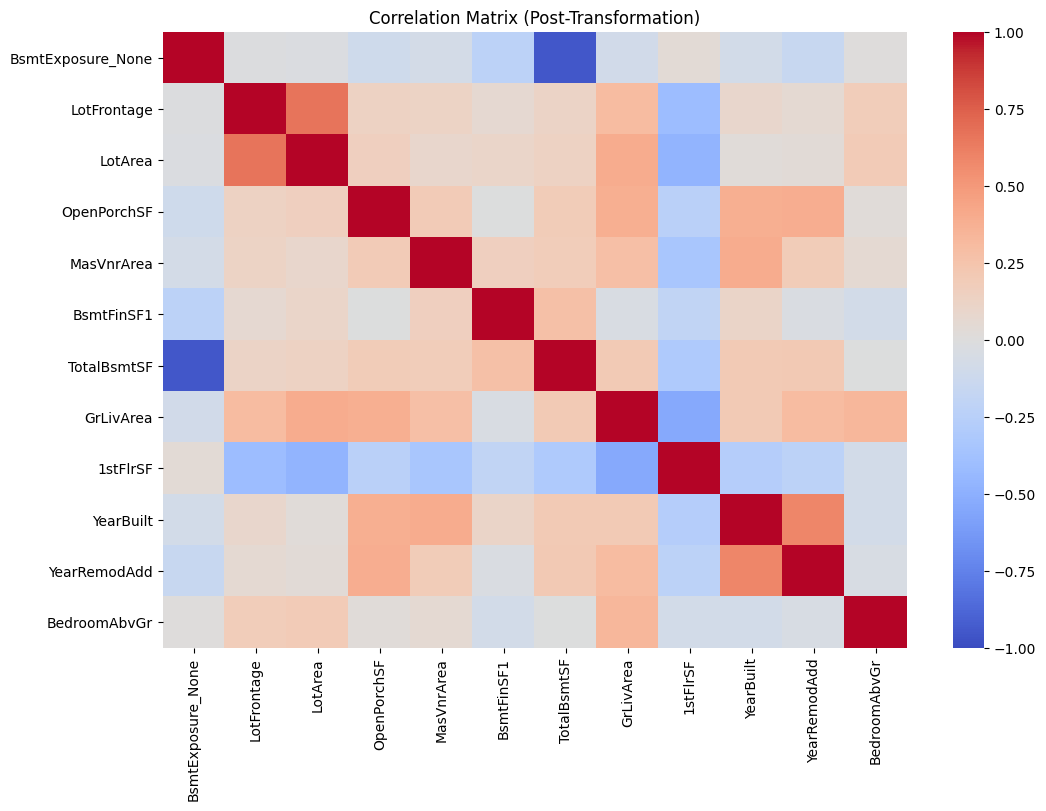

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numerical feature names
num_features = log_skewed_cols + neg_skewed_cols

# Extract categorical feature names if applicable
if remaining_cat_cols:
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(remaining_cat_cols)
else:
    cat_features = []

# Combine feature names
all_features = list(num_features) + list(cat_features)

# Convert transformed training data to DataFrame
x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=all_features)

# Compute correlation matrix
correlation_matrix = x_train_transformed_df.corr()

# Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Post-Transformation)")
plt.show()

In [11]:
# Identify highly correlated features
correlation_threshold = 0.85
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > correlation_threshold]

# Exclude self-correlation (1.0)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]
print("Highly Correlated Features: \n", high_corr_pairs)

Highly Correlated Features: 
 BsmtExposure_None  TotalBsmtSF          0.948154
TotalBsmtSF        BsmtExposure_None    0.948154
dtype: float64


In [12]:
features_to_drop = set()
for feature_a, feature_b in high_corr_pairs.index:
    if feature_a not in features_to_drop:
        features_to_drop.add(feature_b)

# Drop identified features from training and testing datasets
x_train_transformed_df = x_train_transformed_df.drop(columns=features_to_drop)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=all_features).drop(columns=features_to_drop)

print(f"Features dropped due to high correlation: {features_to_drop}")

Features dropped due to high correlation: {'TotalBsmtSF'}


In [13]:
# Sanity Check to ensure features have been dropped
print(x_train_transformed_df.columns)
print(x_test_transformed_df.columns)

Index(['BsmtExposure_None', 'LotFrontage', 'LotArea', 'OpenPorchSF',
       'MasVnrArea', 'BsmtFinSF1', 'GrLivArea', '1stFlrSF', 'YearBuilt',
       'YearRemodAdd', 'BedroomAbvGr'],
      dtype='object')
Index(['BsmtExposure_None', 'LotFrontage', 'LotArea', 'OpenPorchSF',
       'MasVnrArea', 'BsmtFinSF1', 'GrLivArea', '1stFlrSF', 'YearBuilt',
       'YearRemodAdd', 'BedroomAbvGr'],
      dtype='object')


**Observations**

1. **Remaining Categorical Columns:**
   - After completing the encoding process, no categorical columns remained for transformation in this section.
   - This indicates that previous transformations successfully handled categorical features.

2. **Feature Correlations:**
   - A heatmap of the correlation matrix for the transformed dataset was generated to identify multicollinearity.
   - High correlation (above the threshold of 0.85) was detected between `TotalBsmtSF` and other numerical features.

3. **Feature Removal:**
   - To address multicollinearity, the feature `TotalBsmtSF` was removed from the dataset.
   - This step helps prevent redundancy and ensures that features included in the model are not overly dependent on each other.

4. **Impact on Dataset:**
   - The remaining features now exhibit lower levels of multicollinearity.
   - This adjustment enhances the reliability of the dataset for downstream modeling tasks.


---

## Create New Features

In this section, we enhance the dataset by creating new features based on domain knowledge and patterns observed during previous analyses. Feature engineering helps improve model performance by providing meaningful representations of the data.

**New Features to be Added:**
1. **Age:** The age of the house since its construction.
2. **LivingLotRatio:** The ratio of the living area to the lot area, which may indicate efficient use of land.
3. **FinishedBsmtRatio:** The proportion of the basement that is finished, highlighting useability.
4. **OverallScore:** A combined score of the overall quality and condition of the house.
5. **HasPorch:** A binary indicator showing whether the house has a porch.

Each of these features will be calculated based on the existing columns in the dataset.

In [14]:
import datetime

# Get the current year

current_year = datetime.datetime.now().year

# Create the New Features

# 1. Age of the House
x_train['Age'] = current_year - x_train['YearBuilt']
x_test['Age'] = current_year - x_test['YearBuilt']

# 2. Living Area to Lot Area Ratio
x_train['LivingLotRatio'] = x_train['GrLivArea'] / (x_train['LotArea'] + 1e-5)
x_test['LivingLotRatio'] = x_test['GrLivArea'] / (x_test['LotArea'] + 1e-5)

# 3. Finished Basement Ratio
x_train['FinishedBsmtRatio'] = x_train['BsmtFinSF1'] / (x_train['GrLivArea'] + 1e-5)
x_test['FinishedBsmtRatio'] = x_test['BsmtFinSF1'] / (x_test['GrLivArea'] + 1e-5)

# 4. Overall Condition-Quality Score
x_train['OverallScore'] = x_train['OverallQual'] * x_train['OverallCond']
x_test['OverallScore'] = x_test['OverallQual'] * x_test['OverallCond']

# 5. Porch Presence
x_train['HasPorch'] = (x_train['OpenPorchSF'] > 0).astype(int)
x_test['HasPorch'] = (x_test['OpenPorchSF'] > 0).astype(int)

print("New Features have been added to the training and testing datasets.")

New Features have been added to the training and testing datasets.


**Validate the New Features**

Now that we have created new features for the dataset we need to ensure these are correctly incorporated by checking a preview of the updated datasets.

In [15]:
# Display the first few rows of the updated datasets
print("Training Dataset with New Features:")
print(x_train[['Age', 'LivingLotRatio', 'FinishedBsmtRatio', 'OverallScore', 'HasPorch']].head())

print("\nTesting Dataset with New Features:")
print(x_test[['Age', 'LivingLotRatio', 'FinishedBsmtRatio', 'OverallScore', 'HasPorch']].head())

Training Dataset with New Features:
      Age  LivingLotRatio  FinishedBsmtRatio  OverallScore  HasPorch
254    67        0.794765           0.950711            30         0
1066   31        0.820822           0.000000            42         1
638   114        0.735776           0.000000            35         0
799    87        0.841948           0.848554            35         0
380   100        0.872762           0.724954            30         0

Testing Dataset with New Features:
      Age  LivingLotRatio  FinishedBsmtRatio  OverallScore  HasPorch
892    61        0.771703           0.931722            48         0
1105   30        0.836221           0.881625            40         1
413    97        0.762181           0.000000            30         0
522    77        0.870873           0.807737            42         1
1036   17        0.780863           0.937718            45         0


**Summary of New Features**

The selected new features have now been successfully added to the dataset. These features will provide additional insight during the modeling process and help capture more nuanced patterns in the data.

---

## Scale and Encode Features

This section ensures that all numerical features are scaled and any categorical features are encoded. To do this, we will:
1. Include the newly created features.
2. Reapply preprocessing steps to the updated dataset.
3. Validate the final transformed dataset.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define updated numerical and categorical columns
updated_num_cols = ['Age', 'LivingLotRatio', 'FinishedBsmtRatio', 'OverallScore', 'GrLivArea', 'LotArea']
updated_cat_cols = ['HasPorch']

# Update the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), updated_num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), updated_cat_cols)
])

# Apply preprocessing to the updated dataset
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

print("Scaling and encoding applies to the updated dataset.")

Scaling and encoding applies to the updated dataset.


In [19]:
import pandas as pd

all_features = updated_num_cols + updated_cat_cols
x_train_transformed_df = pd.DataFrame(
    x_train_transformed,
    columns=preprocessor.get_feature_names_out()
)

print("Transformed dataset preview:")
print(x_train_transformed_df.head())

print("Shape of transformed training dataset:", x_train_transformed_df.shape)

Transformed dataset preview:
   num__Age  num__LivingLotRatio  num__FinishedBsmtRatio  num__OverallScore  \
0  0.455469            -0.116096                0.887733          -0.437833   
1 -0.718609             0.455054               -1.415946           0.858190   
2  1.988293            -1.409123               -1.415946           0.102176   
3  1.107734             0.918129                0.640194           0.102176   
4  1.531707             1.593562                0.340697          -0.437833   

   num__GrLivArea  num__LotArea  cat__HasPorch_1  
0       -0.292584     -0.161873              0.0  
1        0.250597     -0.304082              1.0  
2       -1.816242     -0.071879              0.0  
3        0.609851     -0.477855              0.0  
4        0.474436     -1.225280              0.0  
Shape of transformed training dataset: (1168, 7)


**Observations**
- The preprocessing pipeline has been updated to include the newly created features.
- Numerical features have been standardized, and categorical features have been one-hot encoded.
- The transformed dataset is ready for downstream tasks such as model training.

---

## Save Final Dataset

In this section, the fully transformed training and testing datasets will be saved. These datasets are now ready for modeling and will be stored in the `processed` directory for further use.

**Outputs:**
1. `x_train_transformed.csv` - The transformed training dataset.
2. `x_test_transformed.csv` - The transformed testing dataset.

The target variable datasets (`y_train` and `y_test`) have already been saved in the previous Data Cleaning Notebook.

In [20]:
import os

# Define directory to save the datasets
transformed_dir = "outputs/datasets/processed/transformed"
os.makedirs(transformed_dir, exist_ok=True)

# File paths for transformed datasets
x_train_path = os.path.join(transformed_dir, "x_train_transformed.csv")
x_test_path = os.path.join(transformed_dir, "x_test_transformed.csv")

# Save transformed datasets
pd.DataFrame(x_train_transformed).to_csv(x_train_path, index=False)
pd.DataFrame(x_test_transformed).to_csv(x_test_path, index=False)

print(f"Transformed training dataset saved to: {x_train_path}")
print(f"Transformed testing dataset saved to: {x_test_path}")


Transformed training dataset saved to: outputs/datasets/processed/transformed/x_train_transformed.csv
Transformed testing dataset saved to: outputs/datasets/processed/transformed/x_test_transformed.csv


---

## Conclusion & Next Steps

### Conclusion

By following this notebook, we have:

1. **Feature Selection:**
   - Analyzed the importance of features using Random Forest to identify the most influential predictors of house prices.
   - Prioritized features that contribute significantly to the predictive model's accuracy.

2. **Feature Transformation:**
   - Checked and addressed skewness in numerical features to improve the distribution of data.
   - Applied log transformations to positively skewed features and reflections for negatively skewed features.

3. **Addressed Multicollinearity:**
   - Identified and removed highly correlated features (`TotalBsmtSF`) to reduce redundancy and avoid multicollinearity issues.
   - Verified that the remaining features are independent and informative.

4. **Created New Features:**
   - Derived new features, such as the age of the house, living area-to-lot area ratio, and finished basement ratio, to enhance predictive power.
   - Validated these features to confirm their relevance and accuracy.

5. **Scaled and Encoded Features:**
   - Standardized numerical features to ensure all variables are on the same scale.
   - Dynamically encoded categorical features while handling unknown values, ensuring compatibility with machine learning models.
   - Verified the transformed dataset's structure and usability.

6. **Saved the Transformed Dataset:**
   - Stored the final training and testing datasets in the `outputs/datasets/processed/transformed` folder for downstream modeling tasks.

### Next Steps

1. **Model Training and Optimization:**
   - Use the transformed datasets to train regression models that predict house prices.
   - Optimize hyperparameters for improved performance.

2. **Model Validation:**
   - Evaluate the models on unseen data to ensure their robustness and reliability.

3. **Insights and Visualizations:**
   - Generate visualizations to provide insights into the key predictors of house prices.
   - Present findings in the dashboard for the client.

4. **Deployment Preparation:**
   - Ensure the transformed datasets and trained models are prepared for deployment on the project dashboard.


---